In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Training\\Phase 1\\Dataset\\diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
label_enc = LabelEncoder()
df['gender'] = label_enc.fit_transform(df['gender'])
df['smoking_history'] = label_enc.fit_transform(df['smoking_history'])

In [5]:
df = df.dropna()

In [7]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.97


In [10]:
importances = clf.feature_importances_
features = X.columns

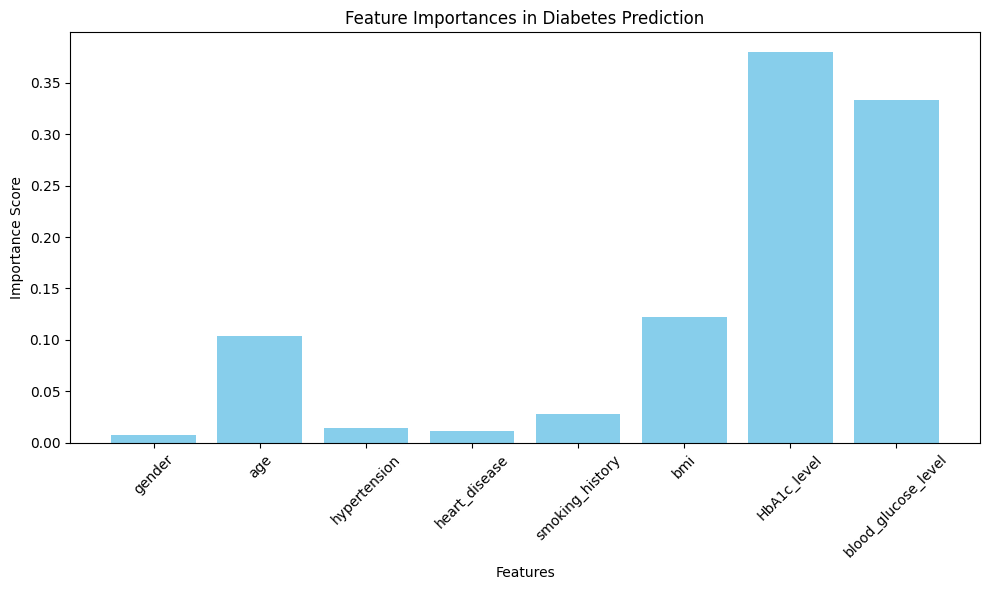

In [11]:
plt.figure(figsize=(10,6))
plt.bar(features, importances, color='skyblue')
plt.xticks(rotation=45)
plt.title('Feature Importances in Diabetes Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()

In [12]:
most_important = features[np.argmax(importances)]
print(f"🔍 Most important feature: {most_important}")

🔍 Most important feature: HbA1c_level
